In [1]:
%load_ext autoreload
%autoreload 2

from text3d2video.artifacts.anim_artifact import AnimationArtifact
from text3d2video.artifacts.video_artifact import VideoArtifact
import torch

torch.set_grad_enabled(False)

extr_anim_art = AnimationArtifact.from_wandb_artifact_tag('extr_anim:latest')
extr_ims_art = VideoArtifact.from_wandb_artifact_tag('extr_images:latest')

In [2]:
extr_ims = extr_ims_art.read_frames()
extr_seq = extr_anim_art.read_anim_seq()

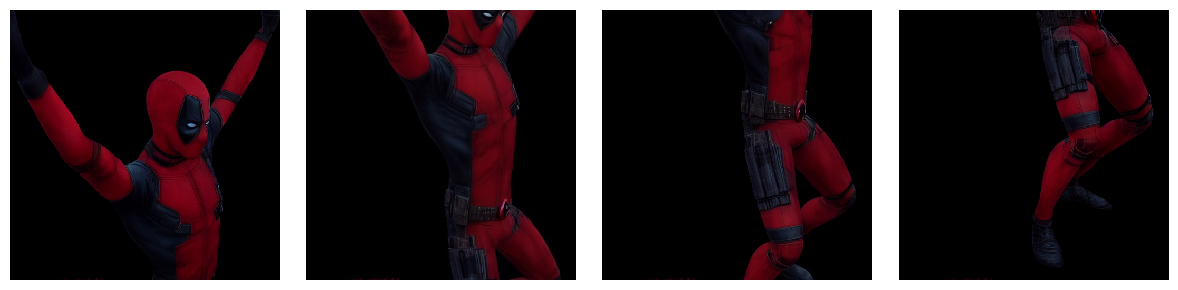

In [3]:
from text3d2video.utilities.ipython_utils import display_ims

display_ims(extr_ims)

In [4]:
from text3d2video.pipelines.generative_rendering_pipeline import RgbExtractionPipeline
from text3d2video.pipelines.pipeline_utils import load_pipeline

pipe = load_pipeline(RgbExtractionPipeline)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
latents = pipe.encode_images(extr_ims)

In [56]:
from text3d2video.inversion import ddim_invert

inverted = ddim_invert(pipe, latents, "Deadpool", num_inference_steps=30)

tensor([  1,  34,  67, 100, 133, 166, 199, 232, 265, 298, 331, 364, 397, 430,
        463, 496, 529, 562, 595, 628, 661, 694, 727, 760, 793, 826, 859, 892,
        925, 958])


100%|██████████| 29/29 [00:03<00:00,  8.73it/s]


: 

In [55]:
# latents = inverted[4]
# display_ims(pipe.decode_latents(latents))